In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('file2.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Columns: 162 entries, srno_2 to INV_ADV
dtypes: float64(82), int64(77), object(3)
memory usage: 2.9+ GB


In [4]:
aum_cloums = df.columns[df.columns.str.contains('srno_2|yyyymm|aum')]
aum_cloums

Index(['srno_2', 'yyyymm', 'aum01', 'aum02', 'aum03', 'aum04', 'aum05',
       'aum06', 'aum07', 'aum08', 'aum09', 'aum10', 'aum11', 'aum12', 'aum13'],
      dtype='object')

In [125]:
aum_df = df[aum_cloums]
aum_df['yyyymm'] = pd.to_datetime(aum_df['yyyymm'], format='%Y%m').apply(lambda x: x.strftime('%Y-%m'))
aum_df

<ipython-input-125-0c0c962ddf93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aum_df['yyyymm'] = pd.to_datetime(aum_df['yyyymm'], format='%Y%m').apply(lambda x: x.strftime('%Y-%m'))


,srno_2,yyyymm,aum01,aum02,aum03,aum04,aum05,aum06,aum07,aum08,aum09,aum10,aum11,aum12,aum13
0,1,2021-01,102217,102217,17,0,0,0,0,0,0,0,0,0,38056
1,1,2021-02,33322,33322,28327,0,0,0,0,0,0,0,0,0,38056
2,1,2021-03,24119,24119,721,0,0,0,0,0,0,0,0,0,38056
3,1,2021-04,44347,44347,706,0,0,0,0,0,0,0,0,0,38056
4,1,2021-05,74274,74274,698,0,0,0,0,0,0,0,0,0,38056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,200000,2021-08,46073,46073,11482,0,0,0,0,0,0,0,0,0,0
2399996,200000,2021-09,23110,23110,23036,0,0,0,0,0,0,0,0,0,0
2399997,200000,2021-10,23006,23006,23006,0,0,0,0,0,0,0,0,0,0
2399998,200000,2021-11,39725,39725,34489,0,0,0,0,0,0,0,0,0,0


aum 13項資產之比較，我們先把客戶12個月的資產分佈取平均，共有20萬筆

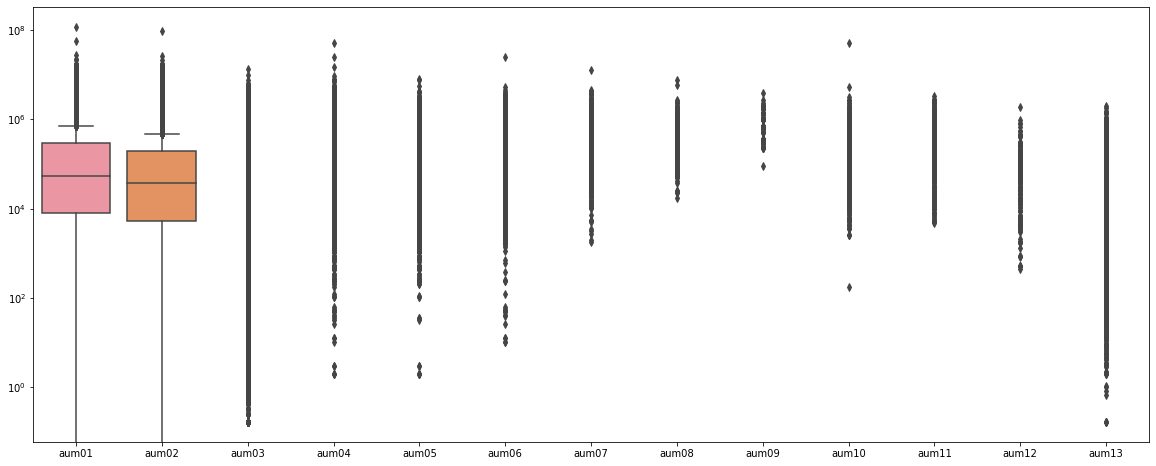

In [82]:
aum_mean = aum_df.drop('yyyymm', axis=1).groupby('srno_2').mean()
plt.figure(figsize=(20,8))
p = sns.boxplot(data=aum_mean)
plt.yscale('log')

aum03~aum13的中位數都是0 可從describe()驗證

In [83]:
aum_mean.describe()

,aum01,aum02,aum03,aum04,aum05,aum06,aum07,aum08,aum09,aum10,aum11,aum12,aum13
count,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05
mean,3.050766e+05,2.233121e+05,2.556690e+04,8.176446e+04,1.310612e+04,5.774443e+04,5.514066e+03,1.605343e+03,7.875596e+02,1.406203e+03,1.494830e+03,1.059219e+02,1.506087e+04
std,6.834177e+05,5.502911e+05,1.453220e+05,3.320920e+05,1.115050e+05,2.490344e+05,8.360173e+04,3.988702e+04,2.777770e+04,1.181284e+05,3.474479e+04,6.821946e+03,3.884649e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.133188e+03,5.332833e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.459092e+04,3.790346e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.936431e+05,1.908175e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.176407e+08,9.258989e+07,1.297297e+07,5.146679e+07,7.931327e+06,2.505084e+07,1.272764e+07,7.391167e+06,3.812847e+06,5.098292e+07,3.378184e+06,1.830366e+06,1.993682e+06


In [90]:
print((aum_mean < 0).sum())
(aum_mean == 0).sum()

aum01    0
aum02    0
aum03    0
aum04    0
aum05    0
aum06    0
aum07    0
aum08    0
aum09    0
aum10    0
aum11    0
aum12    0
aum13    0
dtype: int64


aum01      5547
aum02      9520
aum03    157385
aum04    171634
aum05    191993
aum06    179601
aum07    198155
aum08    199279
aum09    199749
aum10    199131
aum11    199213
aum12    199801
aum13    152965
dtype: int64

aum03~aum13沒有負值，但有很多0 這裡先不看這些值。

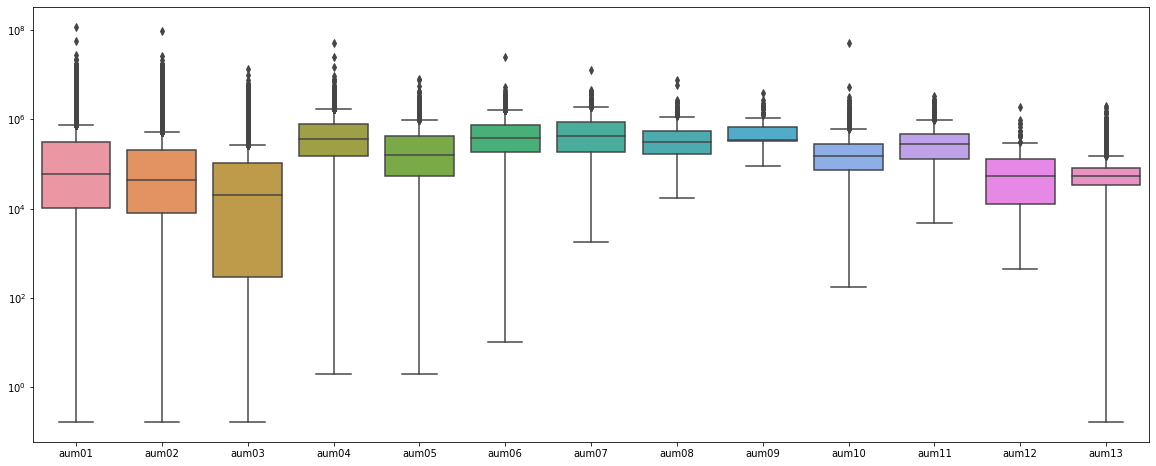

In [93]:
plt.figure(figsize=(20,8))
sns.boxplot(data=aum_mean[aum_mean > 0])
plt.yscale('log')

In [121]:
'''
發現有很多2，不知道正不正常?
'''
aum_mean[aum_mean > 0]['aum13'].argmin()
# aum_df[aum_df['srno_2']==4252]
aum_mean.iloc[51020]
(aum_df == 2).sum()


srno_2       12
yyyymm        0
aum01      9494
aum02     10292
aum03     15886
aum04        36
aum05        48
aum06         0
aum07         0
aum08         0
aum09         0
aum10         0
aum11         0
aum12         0
aum13        43
dtype: int64

從median來看 1,2,3的behavior類似，4~13的behavior也類似，且distribution都很集中

In [95]:
aum_mean[aum_mean > 0].describe() 

,aum01,aum02,aum03,aum04,aum05,aum06,aum07,aum08,aum09,aum10,aum11,aum12,aum13
count,1.944530e+05,1.904800e+05,4.261500e+04,2.836600e+04,8.007000e+03,2.039900e+04,1.845000e+03,7.210000e+02,2.510000e+02,8.690000e+02,7.870000e+02,1.990000e+02,4.703500e+04
mean,3.137792e+05,2.344731e+05,1.199901e+05,5.764963e+05,3.273666e+05,5.661496e+05,5.977307e+05,4.453102e+05,6.275375e+05,3.236370e+05,3.798805e+05,1.064542e+05,6.404113e+04
std,6.911241e+05,5.615497e+05,2.962846e+05,7.017043e+05,4.557504e+05,5.658887e+05,6.355087e+05,4.940389e+05,4.715880e+05,1.763762e+06,4.040419e+05,1.887602e+05,5.727126e+04
min,1.666667e-01,1.666667e-01,1.666667e-01,2.000000e+00,2.000000e+00,1.016667e+01,1.753417e+03,1.712650e+04,9.173058e+04,1.745833e+02,4.865167e+03,4.346667e+02,1.666667e-01
25%,1.003617e+04,7.807417e+03,2.956667e+02,1.526393e+05,5.236000e+04,1.865920e+05,1.849900e+05,1.628980e+05,3.320145e+05,7.330442e+04,1.291079e+05,1.257683e+04,3.301762e+04
50%,5.995083e+04,4.397938e+04,2.050033e+04,3.546400e+05,1.587200e+05,3.840030e+05,4.301940e+05,3.091960e+05,3.472510e+05,1.478131e+05,2.787758e+05,5.229667e+04,5.449708e+04
75%,3.086471e+05,2.075284e+05,1.070076e+05,7.802678e+05,4.188800e+05,7.564669e+05,8.566837e+05,5.545440e+05,6.815170e+05,2.853618e+05,4.628803e+05,1.262981e+05,8.134558e+04
max,1.176407e+08,9.258989e+07,1.297297e+07,5.146679e+07,7.931327e+06,2.505084e+07,1.272764e+07,7.391167e+06,3.812847e+06,5.098292e+07,3.378184e+06,1.830366e+06,1.993682e+06


<AxesSubplot:xlabel='srno_2'>

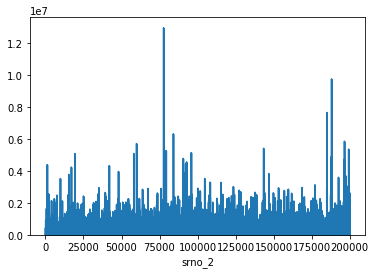

In [130]:
aum_mean['aum03'].plot.area()

### aum01

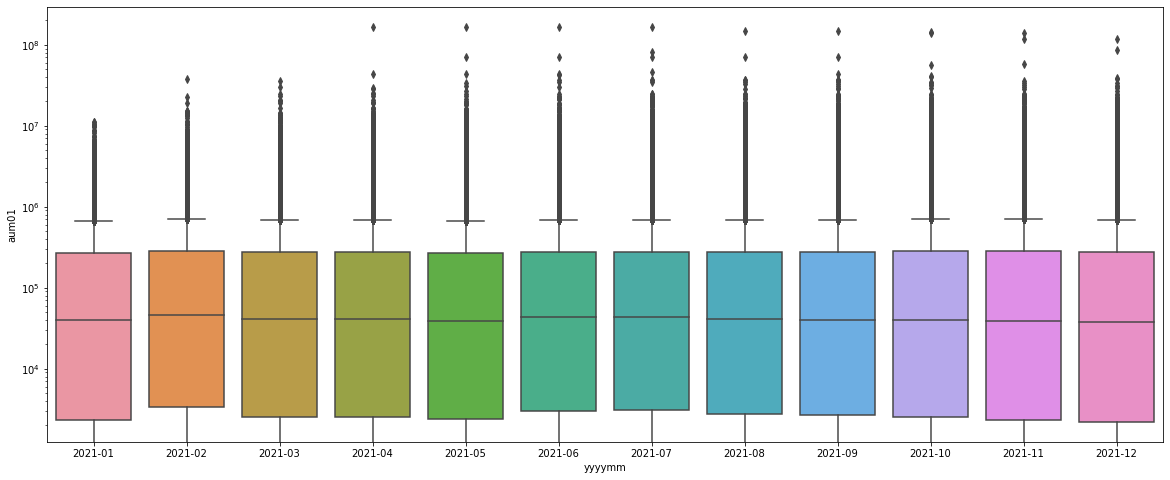

In [132]:
plt.figure(figsize=(20,8))
sns.boxplot(x='yyyymm', y='aum01', data=aum_df)
plt.yscale('log')
#
# plt.show()

處理上界的極端值

捨去 percentile 75% + 1.5 * IQR 和 percentile 25% - 1.5 * IQR

In [7]:
percentile_arr = np.percentile(aum_df['aum01'], [25,75])
iqr = percentile_arr[1] - percentile_arr[0]
up = percentile_arr[1] + iqr*1.5
down = percentile_arr[0] - iqr*1.5
outlier_mask = (aum_df['aum01'] > down) & (aum_df['aum01'] < up)
print(f'上界 : {up}, 下界 : {down}')

上界 : 688123.0, 下界 : -408685.0


In [8]:
print('共捨去 : {} 筆資料'.format((~outlier_mask).sum()))

共捨去 : 323260 筆資料


檢查一下每個月份分別少幾筆

In [9]:
(aum_df.shape[0] // 12 - aum_df[outlier_mask].groupby('yyyymm')['aum01'].count()) / (aum_df.shape[0] // 12)

yyyymm
202101    0.131420
202102    0.134985
202103    0.133530
202104    0.134000
202105    0.133135
202106    0.133980
202107    0.133550
202108    0.134340
202109    0.136495
202110    0.137665
202111    0.137400
202112    0.135800
Name: aum01, dtype: float64

用上下界過濾完產生的資料分佈

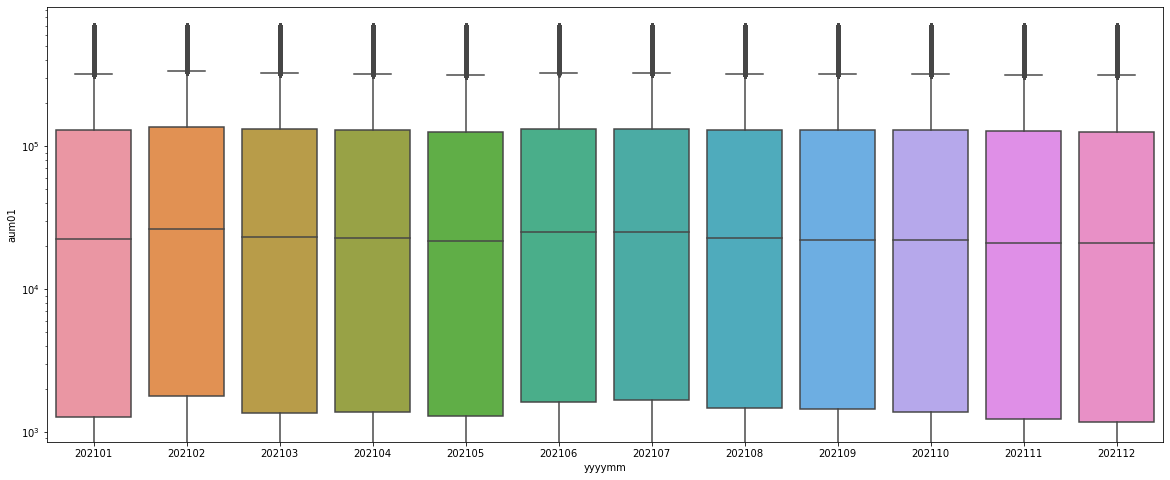

In [10]:
outlier_mask = (aum_df['aum01'] > down) & (aum_df['aum01'] < up)
plt.figure(figsize=(20,8))
sns.boxplot(x='yyyymm', y='aum01', data=aum_df[outlier_mask])
plt.yscale('log')
plt.show()

這邊發現資料量有點太多，不利於視覺化呈現

因此先sample 24000筆

每個月份大約會有2000筆

<AxesSubplot:xlabel='yyyymm', ylabel='aum01'>

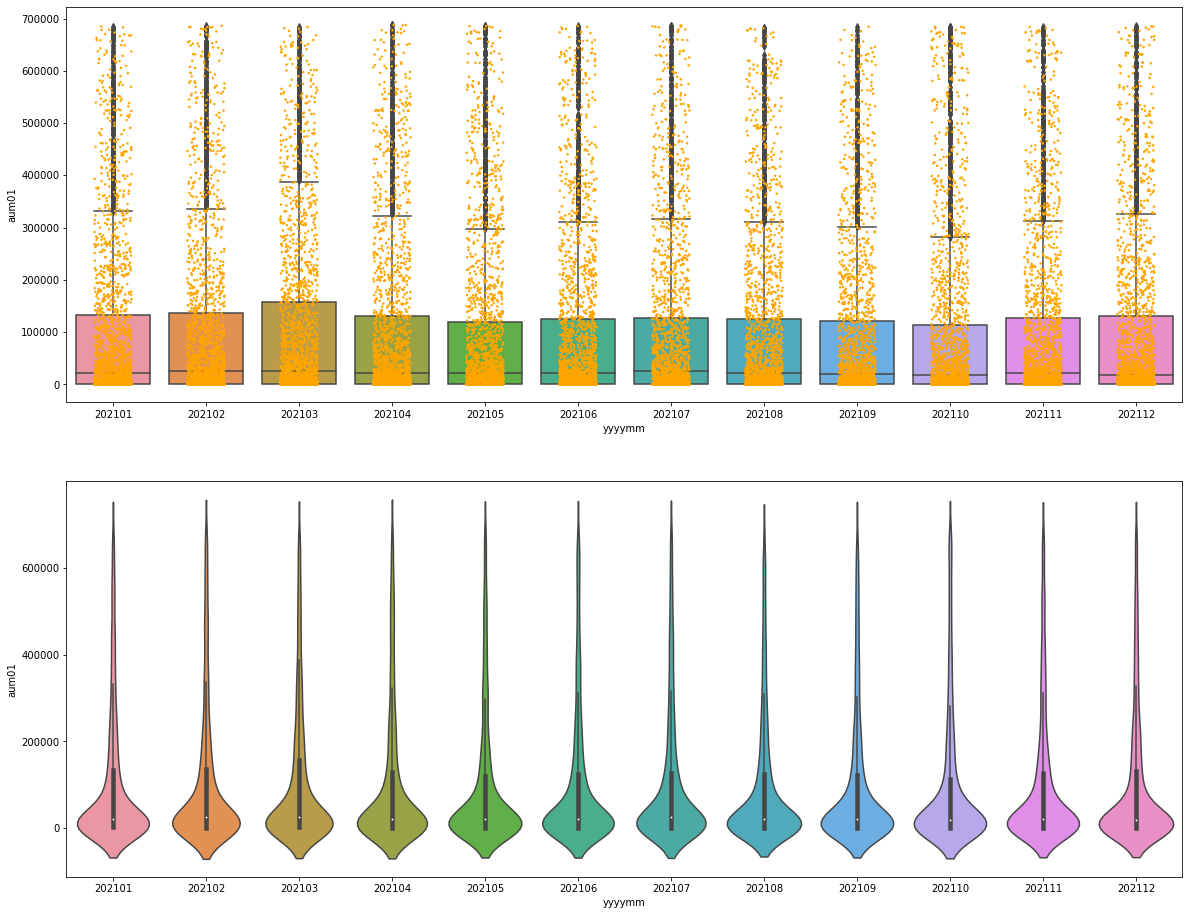

In [11]:
aum_sample_df = aum_df[outlier_mask].sample(n=24000,random_state=1)
fig, ax = plt.subplots(2, 1, figsize=(20,16))
sns.boxplot(x='yyyymm', y='aum01', data=aum_sample_df, ax=ax[0])
sns.stripplot(x='yyyymm', y='aum01', data=aum_sample_df, ax=ax[0], color="orange", jitter=0.2, size=2.5)
sns.violinplot(x='yyyymm', y='aum01', data=aum_sample_df, ax=ax[1])
# ax[0].set(yscale='log')
# ax[1].set(yscale='log')

不同月份的分佈看起來是很接近

<AxesSubplot:xlabel='yyyymm', ylabel='yyyymm'>

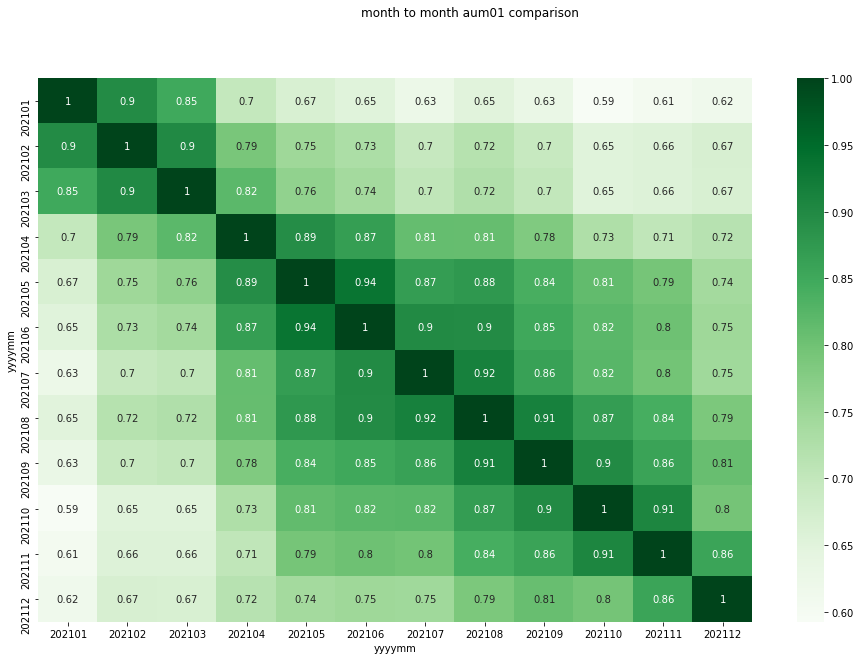

In [12]:
aum01_corr_m = aum_df.pivot(index='srno_2', columns="yyyymm", values="aum01").corr()
plt.figure(figsize=(16,10))
plt.suptitle('month to month aum01 comparison')
sns.heatmap(aum01_corr_m, annot=True, cmap="Greens")

這個結果蠻合理的，不同月份之間越靠近的月份相關性會越大

<AxesSubplot:ylabel='yyyymm'>

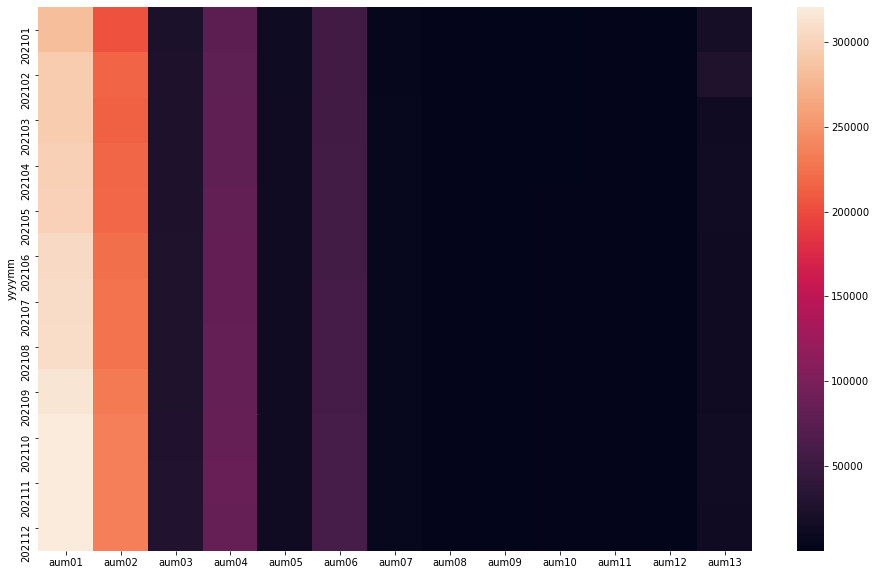

In [13]:
aum_to_date = aum_df.drop('srno_2',axis=1).groupby('yyyymm').mean()
plt.figure(figsize=(16,10))
sns.heatmap(aum_to_date)

同個資產之間的月平均看起來差不多，用折線圖看應該比較明顯

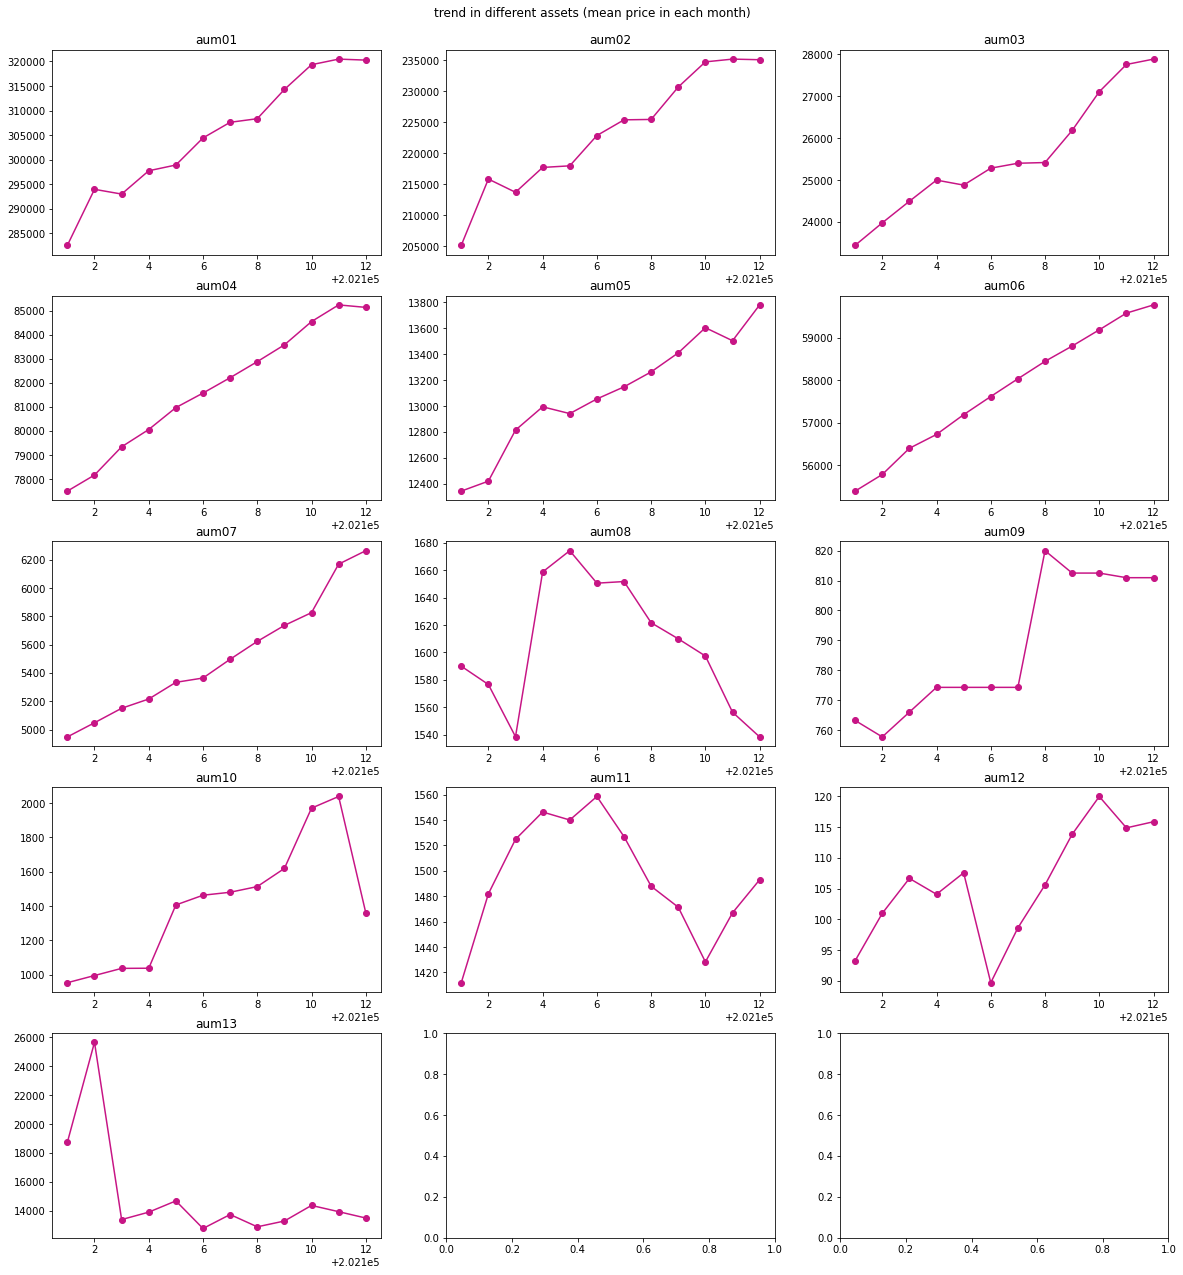

In [14]:
all_aums = aum_df.columns[aum_df.columns.str.contains('aum')]
aums = aum_df.drop('srno_2',axis=1).groupby('yyyymm').mean()
fig, ax = plt.subplots(5, 3, figsize=(20,20))
fig.suptitle('trend in different assets (mean price in each month)')
fig.subplots_adjust(top=0.95)

for i, aum in enumerate(all_aums):
    ax[i//3,i%3].set_title(aum)
    ax[i//3,i%3].plot(aums[aum], marker='o', color='mediumvioletred')

In [15]:
bills = df.columns[df.columns.str.contains('srno|yyyymm|bill')]
bill_df = df[bills]
bill_df = bill_df.rename(columns={'srno_2':'id', 'yyyymm':'month'})
bill_df['month'] = pd.to_datetime(bill_df['month'], format='%Y%m')

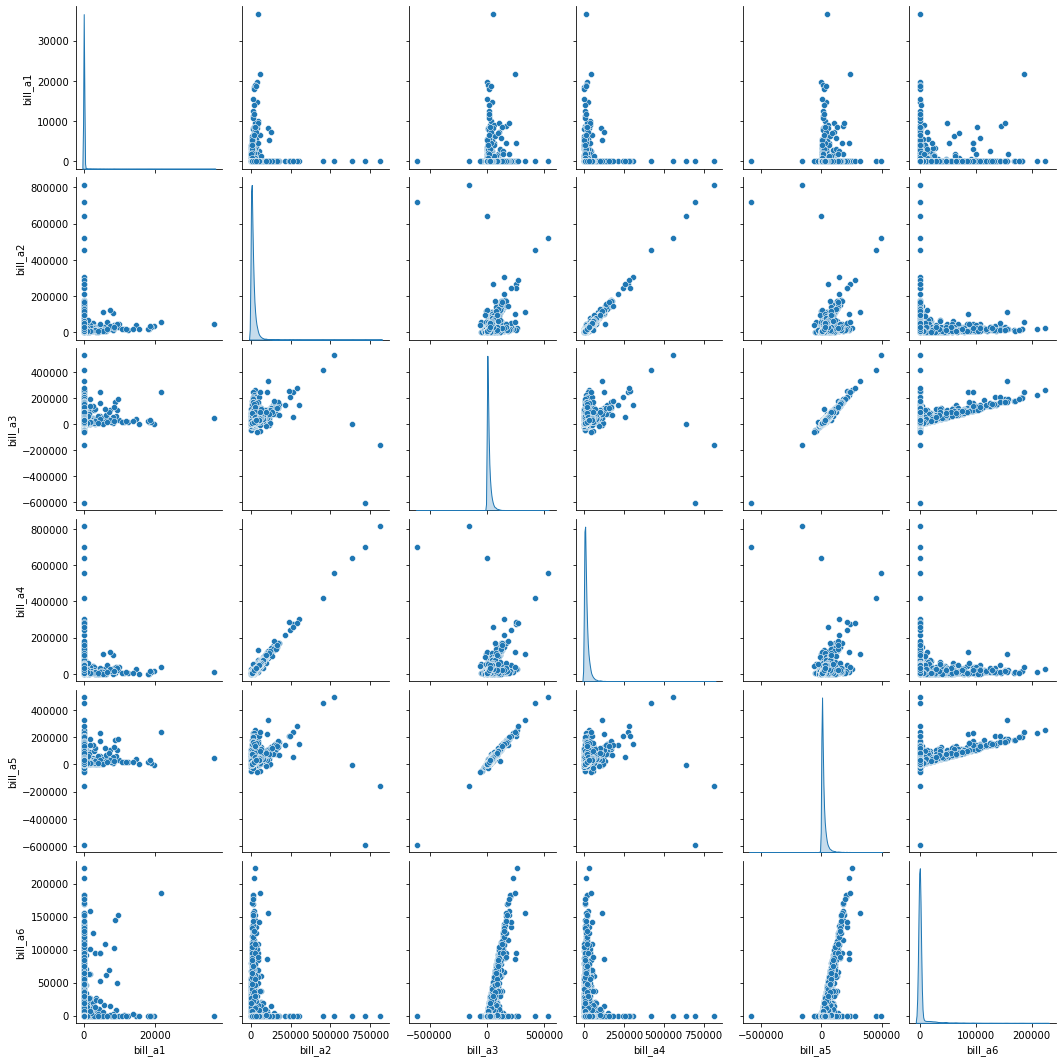

In [20]:
p = sns.pairplot(bill_df.groupby('id').mean().sample(n=10000, random_state=1), diag_kind='kde')
#p.set(ylim=(0,None), xlim=(0,None))

可以看到有些變數之間有蠻明顯的線性關係

但同時看到有一些負的值

且有很多0

先觀察負數、0、正數這三組的分佈

In [17]:
def group(x):
    if x<0:
        return '<0'
    elif x==0:
        return '=0'
    else:
        return '>0'
bill_df.drop(['id', 'month'], axis=1).applymap(group).apply(pd.Series.value_counts)/bill_df.shape[0]

,bill_a1,bill_a2,bill_a3,bill_a4,bill_a5,bill_a6
<0,NaN,NaN,0.031684,NaN,0.030922,NaN
=0,0.990675,0.11726,0.120027,0.139667,0.117466,0.921915
>0,0.009325,0.88274,0.848289,0.860333,0.851611,0.078085


可知只有biil_a3, biil_a5會有負值(數量大概3%)

但不確定這裡負值的意義...

另外bill_a1跟bill_a6裡有很多0

這邊把負數砍掉再畫一次

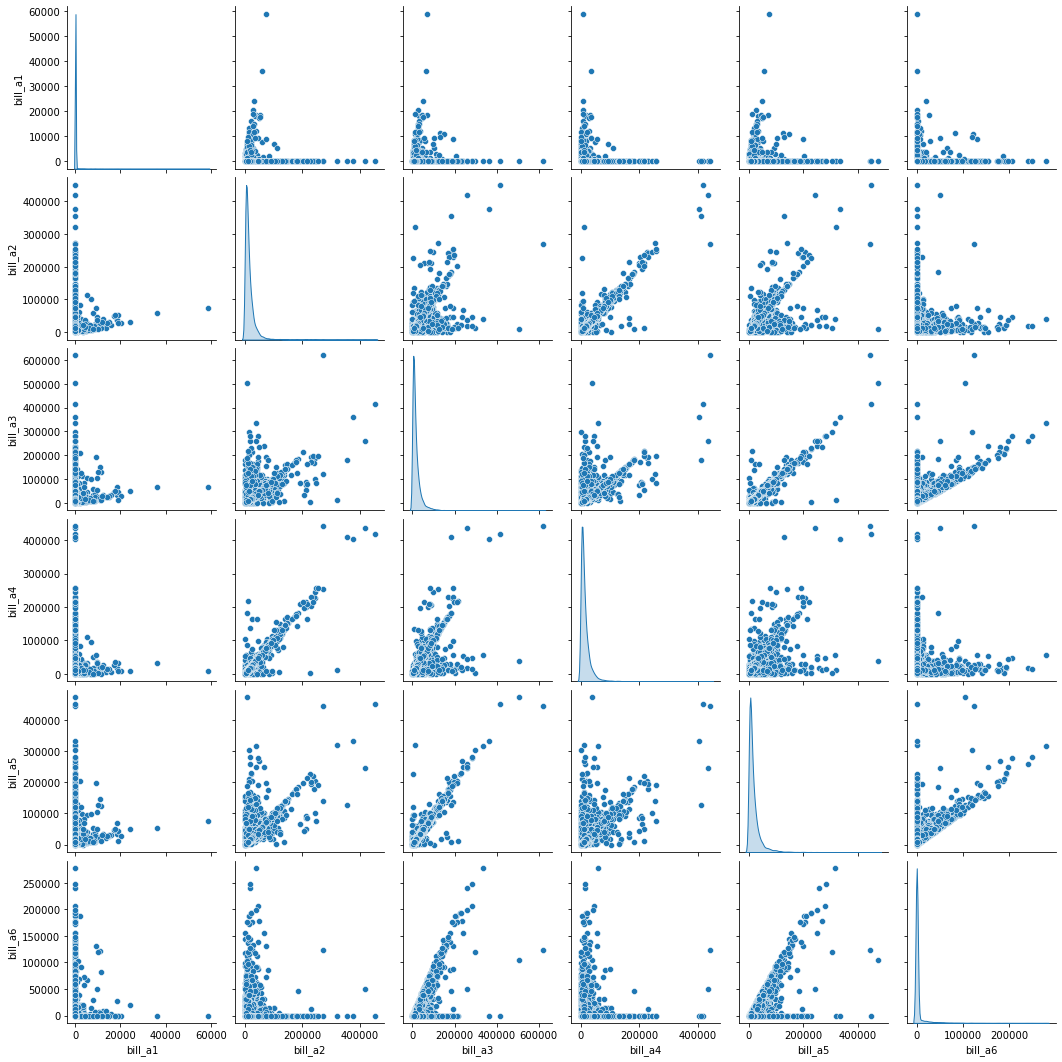

In [21]:
not_negative_make = (bill_df['bill_a3'] > 0) & (bill_df['bill_a5'] > 0) 
sns.pairplot(bill_df[not_negative_make].groupby('id').mean().sample(n=10000, random_state=1), diag_kind='kde')
p.set(ylim=(0,None), xlim=(0,None))

In [19]:
bill_df[not_negative_make]

,id,month,bill_a1,bill_a2,bill_a3,bill_a4,bill_a5,bill_a6
0,1,2021-01-01,0,4199,47196,3069,47784,38932
1,1,2021-02-01,0,5236,42587,0,47196,39445
2,1,2021-03-01,0,3176,51167,11334,42587,34630
3,1,2021-04-01,0,7672,45176,1082,51167,40246
4,1,2021-05-01,0,4235,49269,7819,45176,36261
...,...,...,...,...,...,...,...,...
2399995,200000,2021-08-01,0,1092,1017,1017,1092,0
2399996,200000,2021-09-01,0,1017,2649,2649,1017,0
2399997,200000,2021-10-01,0,2649,658,658,2649,0
2399998,200000,2021-11-01,0,658,10978,10978,658,0
